In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('UTS_data.csv')

In [5]:
df.head()

,Transverse speed (mm/min),Tool rotational speed (rpm),UTS\n(MPa)
0,45,540,104.4
1,54,540,88.2
2,63,540,93.6
3,45,720,85.5
4,54,720,95.4


In [7]:
## Find Out the Shape of the Dataset
df.shape

(29, 3)

In [8]:
## Check for Missing Values or null values in the dataset
df.isnull().sum()

Transverse speed (mm/min)      0
Tool rotational speed (rpm)    0
UTS\n(MPa)                     0
dtype: int64

In [9]:
df.describe()

,Transverse speed (mm/min),Tool rotational speed (rpm),UTS\n(MPa)
count,29.000000,29.000000,29.000000
mean,54.620690,844.137931,127.396552
std,16.996667,160.301440,29.153001
min,27.000000,540.000000,76.500000
25%,45.000000,720.000000,104.400000
50%,54.000000,900.000000,126.000000
75%,63.000000,900.000000,143.100000
max,81.000000,1080.000000,178.200000


In [10]:
## Find out the Corelation between various features in the dataset
df.corr()

,Transverse speed (mm/min),Tool rotational speed (rpm),UTS\n(MPa)
Transverse speed (mm/min),1.000000,0.055651,-0.091137
Tool rotational speed (rpm),0.055651,1.000000,0.678406
UTS\n(MPa),-0.091137,0.678406,1.000000


In [11]:
## Represent the above corelation in a visualized format using seaborn library

import seaborn as sns

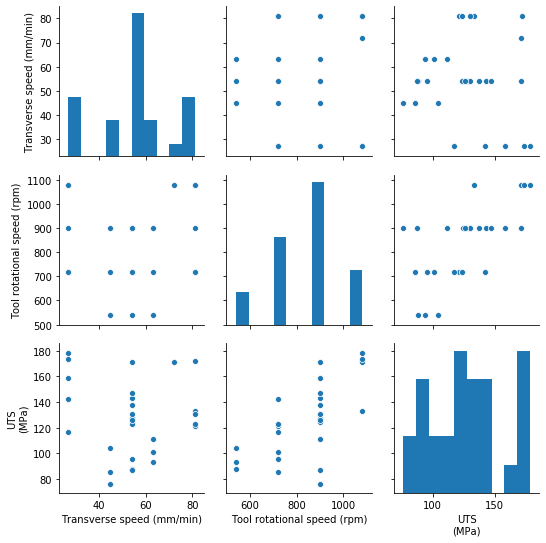

In [12]:
sns.pairplot(df)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

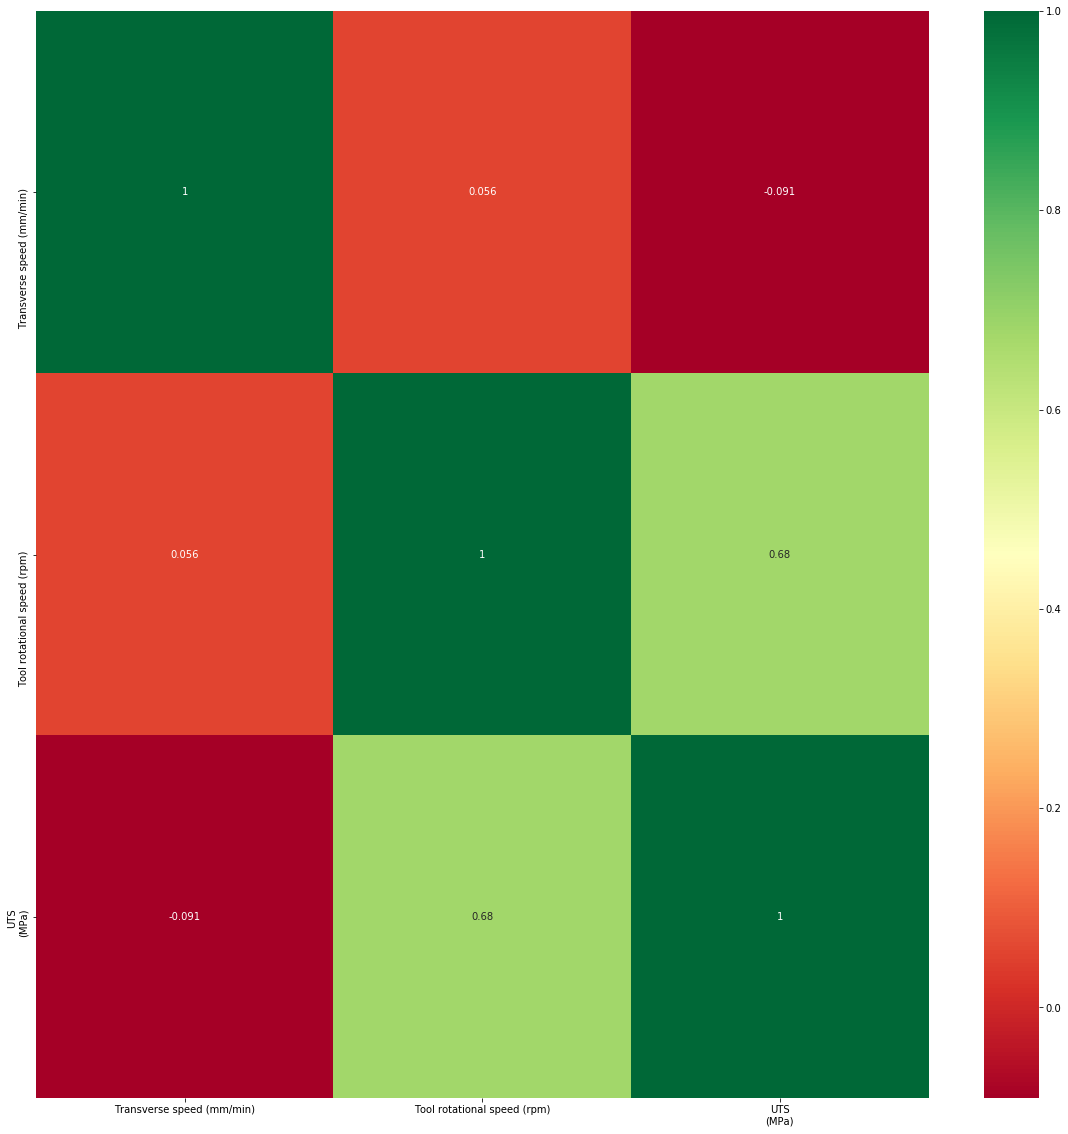

In [16]:
cormat=df.corr()
top_corr_features = cormat.index
plt.figure(figsize=(20,20))
#plot heatmap
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [18]:
## Segregate the independent(X) and dependent features(y)
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [19]:
X.head()

,Transverse speed (mm/min),Tool rotational speed (rpm)
0,45,540
1,54,540
2,63,540
3,45,720
4,54,720


In [20]:
y.head()

0    104.4
1     88.2
2     93.6
3     85.5
4     95.4
Name: UTS\n(MPa), dtype: float64

In [21]:
## Feature Importance : to find out the important features in the dataframe
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [22]:
print(model.feature_importances_)

[0.36833578 0.63166422]


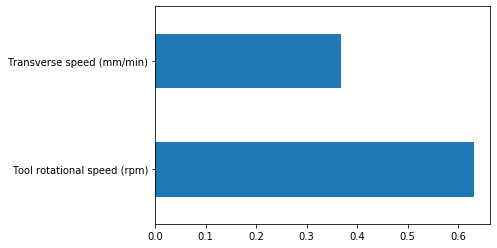

In [23]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [25]:
X_train.shape

(23, 2)

In [26]:
X_test.shape

(6, 2)

# Random Forest Regression Algorithm

In [27]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()

In [28]:
## Custom Setup the Hyperparameters for the model training using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [30]:
## Use the random grid to search the best parameter
## First create the base model
rf = RandomForestRegressor()

In [31]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [32]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [33]:
predictions = rf_random.predict(X_test)

In [34]:
predictions

array([124.72749108, 101.66541536, 137.94762536, 130.7016614 ,
       124.72749108, 124.72749108])

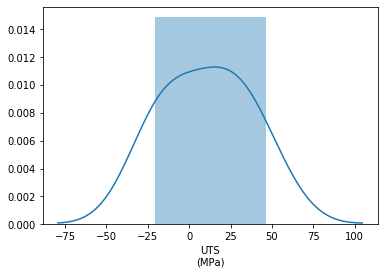

In [35]:
sns.distplot(y_test-predictions)

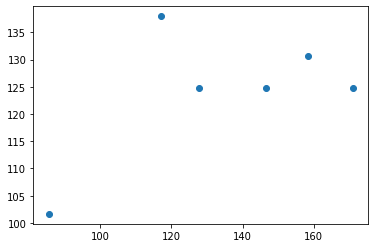

In [36]:
plt.scatter(y_test,predictions)

In [42]:
from sklearn import metrics
import numpy as np
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 22.68815101481844
MSE: 683.449694125468
RMSE: 26.142870808797337


# Linear Regression Algorithm

In [37]:
## -- Model Building --
# Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [38]:
Prediction_Linear = regressor.predict(X_test)

In [39]:
Prediction_Linear

array([132.43176695, 113.40486591, 116.48515749, 137.05220432,
       132.43176695, 132.43176695])

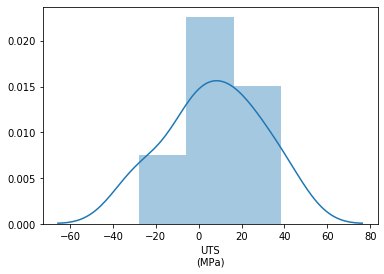

In [40]:
import seaborn as sns
sns.distplot(y_test-Prediction_Linear)

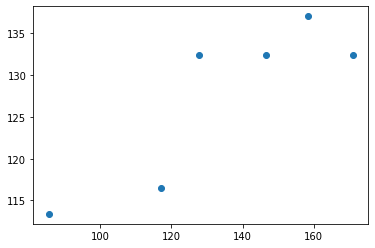

In [47]:
plt.scatter(y_test,Prediction_Linear)

In [41]:
from sklearn import metrics
import numpy as np
print('MAE:',metrics.mean_absolute_error(y_test,Prediction_Linear))
print('MSE:',metrics.mean_squared_error(y_test,Prediction_Linear))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,Prediction_Linear)))

MAE: 17.8726228582188
MSE: 491.2032207583449
RMSE: 22.1631049439907


# Lasso Regression Algorithm

In [43]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [44]:
lasso = Lasso()
parameters = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,5,10,20,30,35,40]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\LearningBee\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4243.320045997022, tolerance: 1.6053479999999998
  positive)
C:\Users\LearningBee\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4305.139279425882, tolerance: 1.6970805000000002
  positive)
C:\Users\LearningBee\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2157.724552983453, tolerance: 0.8723924999999998
  positive)
C:\Users\LearningBee\Documents\Python Scripts\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:532: ConvergenceWarning: Obj

{'alpha': 40}
-510.11788556324535


In [45]:
prediction_lasso = lasso_regressor.predict(X_test)

In [48]:
prediction_lasso

array([131.82561559, 111.76829847, 112.20429081, 132.4796041 ,
       131.82561559, 131.82561559])

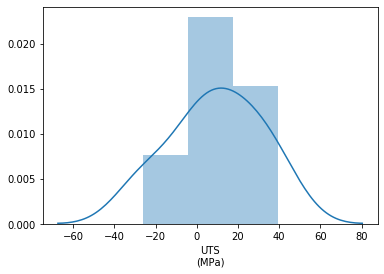

In [49]:
sns.distplot(y_test-prediction_lasso)

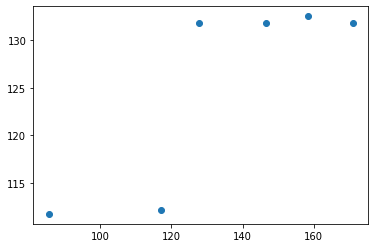

In [57]:
plt.scatter(y_test,prediction_lasso)

In [50]:
from sklearn import metrics
import numpy as np
print('MAE:',metrics.mean_absolute_error(y_test,prediction_lasso))
print('MSE:',metrics.mean_squared_error(y_test,prediction_lasso))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction_lasso)))

MAE: 19.17646466148467
MSE: 526.1624235142584
RMSE: 22.938230609928446


# Ridge Regression Algorithm

In [51]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [53]:
ridge=Ridge()
parameters = {'alpha' : [1e-15, 1e-10, 1e-8, 1e-3, 1e-2,1,5,10,20,30,35,40]}
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 40}
-516.4663870500631


In [54]:
prediction_ridge = ridge_regressor.predict(X_test)

In [55]:
prediction_ridge

array([132.42746868, 113.39236106, 116.45311435, 137.01859861,
       132.42746868, 132.42746868])

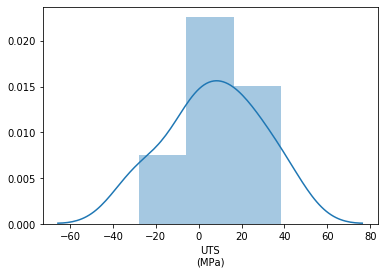

In [56]:
sns.distplot(y_test-prediction_ridge)

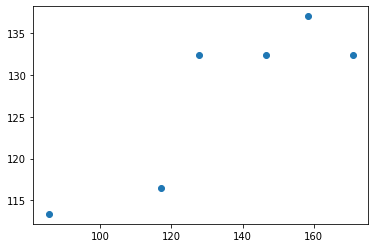

In [58]:
plt.scatter(y_test,prediction_ridge)

In [59]:
from sklearn import metrics
import numpy as np
print('MAE:',metrics.mean_absolute_error(y_test,prediction_ridge))
print('MSE:',metrics.mean_squared_error(y_test,prediction_ridge))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,prediction_ridge)))

MAE: 17.882196571922208
MSE: 491.4010007208579
RMSE: 22.16756641403963
